En los entornos laborales, los accidentes de trabajo continúan siendo una preocupación significativa tanto para empleadores como para organismos de control. A pesar de los avances en normativas y protocolos de seguridad, miles de incidentes ocurren cada año, generando consecuencias humanas, económicas y legales considerables.

Este trabajo se centra en el análisis de datos históricos sobre accidentes laborales ocurridos en Estados Unidos durante los últimos 10 años. A partir de una base de datos oficial, se exploran patrones relacionados con la frecuencia, distribución geográfica y gravedad de los accidentes, con especial atención en los casos más severos, como las amputaciones.

**🎯 Motivación**
La motivación detrás de este análisis es doble:

Detectar patrones y zonas críticas donde los accidentes son más frecuentes o más graves.

Contribuir al desarrollo de estrategias de prevención, brindando información útil para la toma de decisiones en políticas de salud y seguridad ocupacional.

**👥 Audiencia objetivo**
Este estudio está orientado a:

Profesionales en Seguridad e Higiene Laboral

*   Áreas de Recursos Humanos y Prevención de Riesgos
*   Autoridades de gobierno relacionadas con el trabajo y la seguridad
*   Profesionales en la Prevencion de Riesgos


# Cargamos base de datos y importamos bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Base de datos/January2015toOctober2024.csv")



/tmp/ipython-input-1309853664.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Base de datos/January2015toOctober2024.csv")


# Informacion de DataSet

In [2]:
df.head()

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title,FederalState
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,...,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody,1
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,...,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN,1
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,...,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed,1
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,...,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u...",1
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,...,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN,1


In [3]:
df.describe()


,ID,UPA,Zip,Latitude,Longitude,Hospitalized,Amputation,Inspection,Nature,Part of Body,Event,Source,Secondary Source,FederalState
count,9.597800e+04,9.597800e+04,95954.000000,95868.000000,95868.000000,95978.000000,95971.000000,3.240900e+04,95978.000000,95978.000000,95978.000000,95978.000000,40566.000000,95978.000000
mean,4.753377e+09,1.540207e+06,47317.352356,36.616442,-87.582368,0.815354,0.265236,1.407465e+06,830.717904,2015.618017,3806.085478,4785.698316,4393.125548,0.976432
std,6.496774e+09,3.761068e+05,25049.463853,5.570242,11.905176,0.405759,0.441862,2.156585e+05,747.569021,2493.255762,2461.231004,2930.467249,3326.274799,0.151699
min,2.015010e+09,8.674120e+05,716.000000,-34.920000,-170.710000,0.000000,0.000000,8.371470e+05,7.000000,6.000000,20.000000,10.000000,10.000000,0.000000
25%,2.017077e+09,1.221053e+06,30312.000000,32.000000,-95.470000,1.000000,0.000000,1.222834e+06,111.000000,310.000000,644.000000,3191.000000,990.000000,1.000000
50%,2.020077e+09,1.483661e+06,44890.000000,38.690000,-87.380000,1.000000,0.000000,1.407750e+06,1212.000000,512.000000,4330.000000,4213.000000,4120.000000,1.000000
75%,2.023087e+09,1.875320e+06,72315.000000,41.040000,-80.540000,1.000000,1.000000,1.588491e+06,1311.000000,4422.000000,6242.000000,7125.000000,7242.000000,1.000000
max,2.024101e+10,2.261575e+06,99926.000000,70.340000,166.640000,6.000000,2.000000,1.805713e+06,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,1.000000


In [4]:
print(type(df))
df.dtypes

<class 'pandas.core.frame.DataFrame'>


,0
ID,int64
UPA,int64
EventDate,object
Employer,object
Address1,object
Address2,object
City,object
State,object
Zip,float64
Latitude,float64


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,95978.0,4.753377e+09,6.496774e+09,2.015010e+09,2.017077e+09,2.020077e+09,2.023087e+09,2.024101e+10
UPA,95978.0,1.540207e+06,3.761068e+05,8.674120e+05,1.221053e+06,1.483661e+06,1.875320e+06,2.261575e+06
Zip,95954.0,4.731735e+04,2.504946e+04,7.160000e+02,3.031200e+04,4.489000e+04,7.231500e+04,9.992600e+04
Latitude,95868.0,3.661644e+01,5.570242e+00,-3.492000e+01,3.200000e+01,3.869000e+01,4.104000e+01,7.034000e+01
Longitude,95868.0,-8.758237e+01,1.190518e+01,-1.707100e+02,-9.547000e+01,-8.738000e+01,-8.054000e+01,1.666400e+02
Hospitalized,95978.0,8.153535e-01,4.057591e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
Amputation,95971.0,2.652364e-01,4.418624e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
Inspection,32409.0,1.407465e+06,2.156585e+05,8.371470e+05,1.222834e+06,1.407750e+06,1.588491e+06,1.805713e+06
Nature,95978.0,8.307179e+02,7.475690e+02,7.000000e+00,1.110000e+02,1.212000e+03,1.311000e+03,9.999000e+03
Part of Body,95978.0,2.015618e+03,2.493256e+03,6.000000e+00,3.100000e+02,5.120000e+02,4.422000e+03,9.999000e+03


In [6]:
df.shape

(95978, 27)

# Limpieza de datos


**Trabajamos con los datos Null, vemos que datos nulos hay en el DS, y partiendo de ahi, anlizamos que hacemos con cada columna que los posee.**

In [7]:
print(df.isnull().sum())

ID                            0
UPA                           0
EventDate                     0
Employer                      0
Address1                     18
Address2                  87484
City                         17
State                         0
Zip                          24
Latitude                    110
Longitude                   110
Primary NAICS                 2
Hospitalized                  0
Amputation                    7
Inspection                63569
Final Narrative               0
Nature                        0
NatureTitle                   0
Part of Body                  0
Part of Body Title            0
Event                         0
EventTitle                    0
Source                        0
SourceTitle                   0
Secondary Source          55412
Secondary Source Title    55412
FederalState                  0
dtype: int64


Las columnas Address2, inspection, Secondary Source y Secondary Source Title, tienen muchos valores nulos, y nos son datos que sean relevantes para nuestro estudio, en este caso vamos a elimnas esas columnas creando un DS nuevo, el cual no incluya esas columnas.

In [8]:
df2=df.copy() #Aca dejamos el backup


In [9]:
df = df.drop(columns=["Address2", "Inspection", "Secondary Source", "Secondary Source Title"]) # borramos las columnas que no nos van a servir

In [10]:
print(df.isnull().sum())

ID                      0
UPA                     0
EventDate               0
Employer                0
Address1               18
City                   17
State                   0
Zip                    24
Latitude              110
Longitude             110
Primary NAICS           2
Hospitalized            0
Amputation              7
Final Narrative         0
Nature                  0
NatureTitle             0
Part of Body            0
Part of Body Title      0
Event                   0
EventTitle              0
Source                  0
SourceTitle             0
FederalState            0
dtype: int64


En el caso de las columnas address 1, zip, Primary NAICS, Amputation,  Latitude y Longitude, son columnas que en principio no vamos a usar, pero al tener pocas filas faltantes (En comparacion a la cantidad de filas), vamos a eliminar todas las filas donde tengan valores nulls

In [11]:
df = df.dropna(subset=["Address1", "Zip", "Latitude", "Longitude", "Amputation", "Primary NAICS"])


In [12]:
print(df.isnull().sum()) #Verificamos que se hayan borrados los valores necesitados
#Ademas nos damos cuenta que en la columna city, aunque todavia no las trabajamos, tampoco tenemos valores nulls.

ID                    0
UPA                   0
EventDate             0
Employer              0
Address1              0
City                  0
State                 0
Zip                   0
Latitude              0
Longitude             0
Primary NAICS         0
Hospitalized          0
Amputation            0
Final Narrative       0
Nature                0
NatureTitle           0
Part of Body          0
Part of Body Title    0
Event                 0
EventTitle            0
Source                0
SourceTitle           0
FederalState          0
dtype: int64


In [13]:
df.shape #los valores borrados son insignificantes, para el estudio que vamos a realizar.

(95831, 23)

In [14]:
pd.set_option('display.max_columns', None)  # Permite ver todas las columnas

print(df.head())

           ID     UPA EventDate  \
0  2015010015  931176  1/1/2015   
1  2015010016  930267  1/1/2015   
2  2015010018  929823  1/1/2015   
3  2015010019  929711  1/1/2015   
4  2015010020  929642  1/1/2015   

                                         Employer               Address1  \
0  FCI Otisville Federal Correctional Institution         Two Mile Drive   
1                      Kalahari Manufacturing LLC     171 Progress Drive   
2                 Schneider National Bulk Carrier    420 CORAOPOLIS ROAD   
3                       PEPSI BOTTLING GROUP INC.      4541 HOUSTON AVE.   
4                 North American Pipe Corporation  210 South Arch Street   

          City         State      Zip  Latitude  Longitude Primary NAICS  \
0    OTISVILLE      NEW YORK  10963.0     41.46     -74.53        922140   
1  LAKE DELTON     WISCONSIN  53940.0     43.59     -89.79        339999   
2   CORAOPOLIS  PENNSYLVANIA  15108.0     40.49     -80.11        484121   
3        MACON       GEORGIA

# 🔍 Introducción al Análisis de Datos
Una vez depurada la base de datos, comenzamos el análisis exploratorio con el objetivo de entender cómo se distribuyen los accidentes laborales a lo largo del país. Para ello, organizamos la información según tres dimensiones clave:



*   Ciudad: Para identificar las zonas geográficas con mayor concentración de   accidentes
*   Causa del accidente: Para conocer los factores o actividades que los originan
*   Parte del cuerpo afectada: Para evaluar la gravedad y tipo de lesiones más comunes.
*   Sector industrial donde de producen mas accidentes.


---


Este enfoque nos permite detectar patrones críticos y establecer prioridades de intervención basadas en evidencia concreta. A lo largo de esta sección se presentan visualizaciones y métricas que ayudan a interpretar el comportamiento de los accidentes en distintos contextos laborales.
---



**Causa del accidente: Para conocer los factores o actividades que los originan**


***¿Cuales son las causas que provocan mayores accidentes?***

In [15]:
cantidad_accidentes = df["EventTitle"].value_counts().reset_index()
cantidad_accidentes.columns = ["EventTitle", "Cantidad"]
cantidad_accidentes = cantidad_accidentes.sort_values(by="Cantidad", ascending=False)

print(cantidad_accidentes.head(10))

                                          EventTitle  Cantidad
0  Caught in running equipment or machinery durin...      6686
1             Other fall to lower level, unspecified      5909
2  Caught in running equipment or machinery durin...      5271
3  Compressed or pinched by shifting objects or e...      4972
4                Fall on same level due to slipping       3656
5         Other fall to lower level less than 6 feet      3305
6  Fall on same level due to tripping over an obj...      2646
7  Struck against moving part of machinery or equ...      2236
8                     Exposure to environmental heat      2195
9  Caught in or compressed by equipment or object...      2139


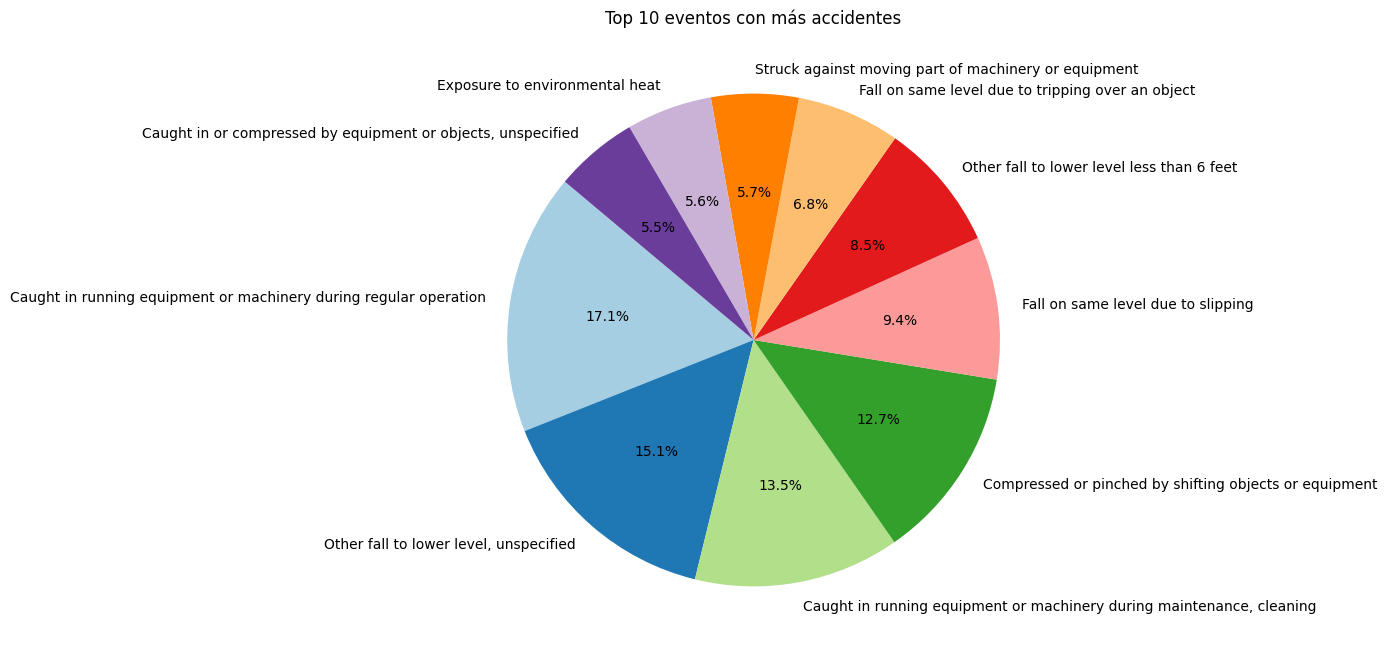

In [16]:
top_10_eventos = cantidad_accidentes.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_eventos["Cantidad"], labels=top_10_eventos["EventTitle"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)

plt.title("Top 10 eventos con más accidentes")

plt.show()

**Ciudad: Para identificar las zonas geográficas con mayor concentración de   accidentes**

***¿Cuales son las ciudades donde se producen mayores accidentes?***

In [17]:
cantidad_accidentes_ciudad = df["City"].value_counts().reset_index()
cantidad_accidentes_ciudad.columns = ["Ciudad", "Cantidad de Accidentes"]
cantidad_accidentes_ciudad = cantidad_accidentes_ciudad.sort_values(by="Cantidad de Accidentes", ascending=False)

# Mostrar solo las primeras 10 filas
print(cantidad_accidentes_ciudad.head(10))


         Ciudad  Cantidad de Accidentes
0       HOUSTON                    1773
1       ORLANDO                     867
2       CHICAGO                     835
3        DALLAS                     818
4   SAN ANTONIO                     705
5         MIAMI                     661
6      COLUMBUS                     643
7  JACKSONVILLE                     628
8       ATLANTA                     622
9    FORT WORTH                     601


/tmp/ipython-input-3927278613.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ciudad", y="Cantidad de Accidentes", data=top_10_ciudades, palette="Blues_r")


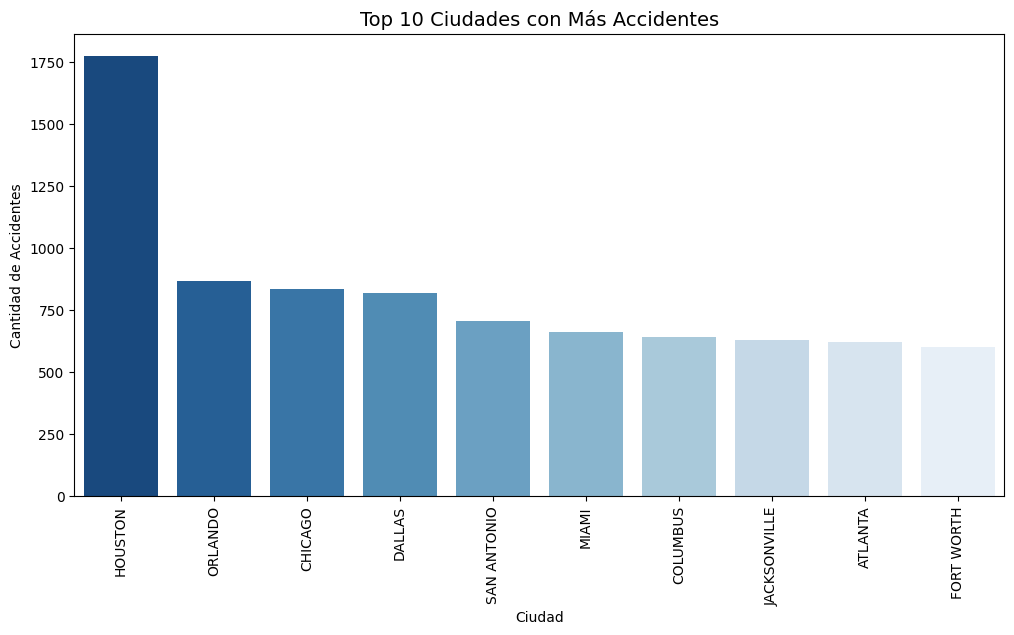

In [18]:
# Filtramos las 10 ciudades con más accidentes
top_10_ciudades = cantidad_accidentes_ciudad.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x="Ciudad", y="Cantidad de Accidentes", data=top_10_ciudades, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Top 10 Ciudades con Más Accidentes", fontsize=14)
plt.xlabel("Ciudad")
plt.ylabel("Cantidad de Accidentes")
plt.show()


**Parte del cuerpo afectada: Para evaluar la gravedad y tipo de lesiones más comunes**

***¿Cuale son las partes del cuerpo que mas afectadas?***

In [19]:
cantidad_accidentes_naturaleza = df["NatureTitle"].value_counts().reset_index()
cantidad_accidentes_naturaleza.columns = ["Tipo de Lesión", "Cantidad de Accidentes"]
cantidad_accidentes_naturaleza = cantidad_accidentes_naturaleza.sort_values(by="Cantidad de Accidentes", ascending=False)


print(cantidad_accidentes_naturaleza.head(10))

                                      Tipo de Lesión  Cantidad de Accidentes
0                                          Fractures                   28438
1                                        Amputations                   23380
2           Soreness, pain, hurt-nonspecified injury                    6509
3                                  Cuts, lacerations                    4264
4                                       Fractures                       2697
5                 Intracranial injuries, unspecified                    1796
6                                  Crushing injuries                    1722
7      Traumatic injuries and disorders, unspecified                    1722
8                  Heat (thermal) burns, unspecified                    1719
9  Internal injuries to organs and blood vessels ...                    1512


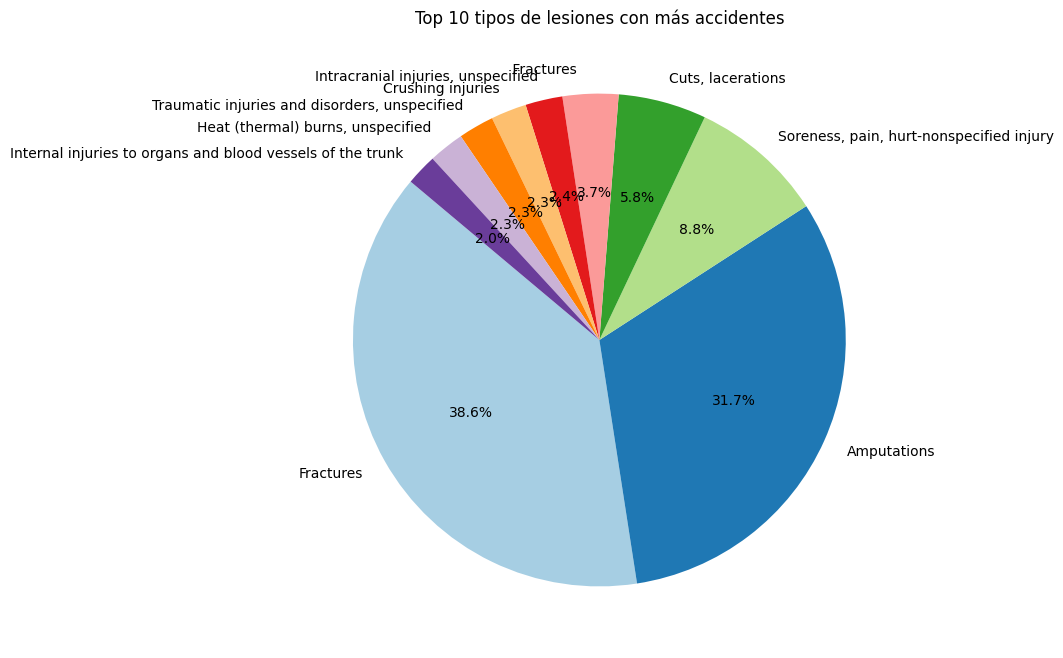

In [20]:

top_10_lesiones = cantidad_accidentes_naturaleza.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_10_lesiones["Cantidad de Accidentes"], labels=top_10_lesiones["Tipo de Lesión"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 10 tipos de lesiones con más accidentes")
plt.show()

**Sector industrial donde de producen mas accidentes.**

***¿En que sector industrial se producen mas accidentes?***

Vamos a analizar las industrias con mas accidentes.
Teniendo en cuenta que el codigo  de la columna Primary NAICS, los dos primero valores son el rubro, y los siguientes 4 una subdivision del rubro. Vamos a crear una nueva columna, con solo los dos primeros digitos de la columna Primary NAICS

In [21]:
df["Primary NAICS Sector"] = df["Primary NAICS"].astype(str).str[:2]

df_sector = df["Primary NAICS Sector"].value_counts().reset_index()

df_sector.columns = ["Sector NAICS", "Cantidad de Accidentes"]

df_sector = df_sector.sort_values(by="Cantidad de Accidentes", ascending=False)

pd.set_option('display.max_rows', None)
print(df_sector)


   Sector NAICS  Cantidad de Accidentes
0            23                   17108
1            33                   14659
2            32                   10054
3            31                    6736
4            42                    5524
5            56                    5320
6            44                    4879
7            62                    4504
8            48                    4306
9            49                    4179
10           21                    2603
11           45                    2379
12           72                    1935
13           81                    1799
14           11                    1715
15           54                    1555
16           22                    1283
17           71                    1261
18           92                    1224
19           53                    1070
20           51                     896
21           61                     473
22           52                     294
23           55                      45


Creamos un diccionario con el codigo naics como clave y el sector como valor, asi reemplazamos en nuestro df el sector por el valor codigo naics.

In [22]:

naics_ = {
    "11": "Agriculture, Forestry, Fishing and Hunting",
    "21": "Mining, Quarrying, and Oil and Gas Extraction",
    "22": "Utilities",
    "23": "Construction",
    "31": "Manufacturing",
    "32": "Manufacturing",
    "33": "Manufacturing",
    "42": "Wholesale Trade",
    "44": "Retail Trade",
    "45": "Retail Trade",
    "48": "Transportation and Warehousing",
    "49": "Transportation and Warehousing",
    "51": "Information",
    "52": "Finance and Insurance",
    "53": "Real Estate and Rental and Leasing",
    "54": "Professional, Scientific, and Technical Services",
    "55": "Management of Companies and Enterprises",
    "56": "Administrative and Support and Waste Management and Remediation Services",
    "61": "Educational Services",
    "62": "Health Care and Social Assistance",
    "71": "Arts, Entertainment, and Recreation",
    "72": "Accommodation and Food Services",
    "81": "Other Services (except Public Administration)",
    "92": "Public Administration"
}

df_sector["Sector NAICS"] = df_sector["Sector NAICS"].replace(naics_)


print(df_sector)


                                         Sector NAICS  Cantidad de Accidentes
0                                        Construction                   17108
1                                       Manufacturing                   14659
2                                       Manufacturing                   10054
3                                       Manufacturing                    6736
4                                     Wholesale Trade                    5524
5   Administrative and Support and Waste Managemen...                    5320
6                                        Retail Trade                    4879
7                   Health Care and Social Assistance                    4504
8                      Transportation and Warehousing                    4306
9                      Transportation and Warehousing                    4179
10      Mining, Quarrying, and Oil and Gas Extraction                    2603
11                                       Retail Trade           

Al observar el listado anterior, vemos que la industria manufactura esta varias veces, entonces, lo refinamos un poco, y juntamos todas las filas de manufactura.

In [23]:
df_sector = df_sector.groupby("Sector NAICS", as_index=False)["Cantidad de Accidentes"].sum()


df_sector = df_sector.sort_values(by="Cantidad de Accidentes", ascending=False)
df_sector = df_sector.reset_index(drop=True)

print(df_sector)


                                         Sector NAICS  Cantidad de Accidentes
0                                       Manufacturing                   31449
1                                        Construction                   17108
2                      Transportation and Warehousing                    8485
3                                        Retail Trade                    7258
4                                     Wholesale Trade                    5524
5   Administrative and Support and Waste Managemen...                    5320
6                   Health Care and Social Assistance                    4504
7       Mining, Quarrying, and Oil and Gas Extraction                    2603
8                     Accommodation and Food Services                    1935
9       Other Services (except Public Administration)                    1799
10         Agriculture, Forestry, Fishing and Hunting                    1715
11   Professional, Scientific, and Technical Services           

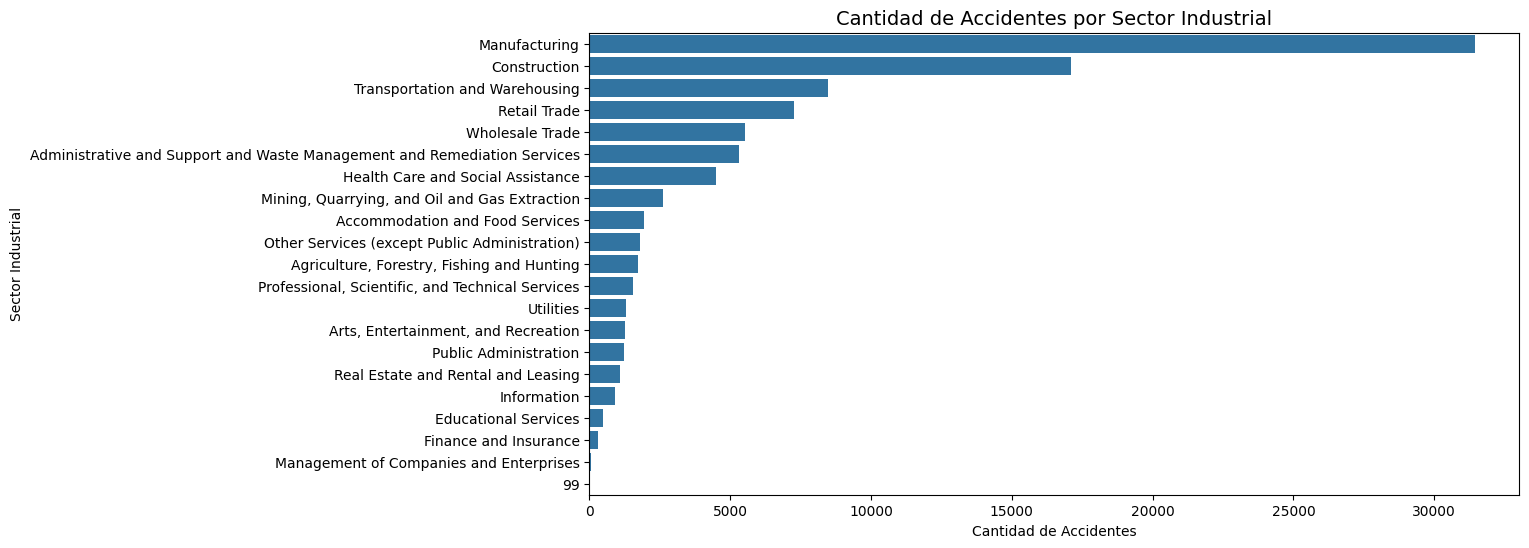

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Cantidad de Accidentes", y="Sector NAICS", data=df_sector)


plt.title("Cantidad de Accidentes por Sector Industrial", fontsize=14)
plt.xlabel("Cantidad de Accidentes")
plt.ylabel("Sector Industrial")


plt.show()


# 💡 Hipótesis
La hipótesis de este trabajo plantea que la necesidad de buscar un punto de partida para poder tratar de reducir los accidentes graves, que son los que tienen mas caracter de urgente.
Para eso analizamos como los accidentes varían de forma significativa entre ciudades y sectores económicos, lo que sugiere que ciertas regiones o actividades presentan mayores niveles de riesgo. Esta variabilidad podría deberse a factores estructurales, condiciones laborales específicas o diferencias en la implementación de medidas preventivas.

Dado que la base de datos original no incluye una variable directa que indique la gravedad del accidente, se creó una nueva columna para este análisis, categorizando los casos como:

Graves: aquellos que implican una amputación.

No graves: aquellos con hospitalización sin amputación.

Esta clasificación, aunque construida por nosotros, se basa en un criterio razonable de severidad física y nos permite desarrollar un análisis comparativo más preciso.

El objetivo es verificar si existe una concentración anómala de accidentes graves en ciertas ciudades o sectores, lo que podría evidenciar fallas en la infraestructura, en la capacitación del personal o en el cumplimiento de normas de seguridad. A partir de estos hallazgos, podremos tener un punto de partida para proponer proponer líneas de acción orientadas a la prevención, especialmente enfocadas en los entornos con mayor riesgo.

Primero vamos a definir los accidentes que nosotros consideramos Graves.


In [25]:

df["Gravedad"] = np.where(df["Amputation"] >= 1, "Grave", "No grave")


df.head()

,ID,UPA,EventDate,Employer,Address1,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,FederalState,Primary NAICS Sector,Gravedad
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,1,92,No grave
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",1,33,No grave
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",1,48,No grave
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,1,42,No grave
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",1,32,No grave


In [26]:
naics_indice = {
    "11": "Agriculture, Forestry, Fishing and Hunting",
    "21": "Mining, Quarrying, and Oil and Gas Extraction",
    "22": "Utilities",
    "23": "Construction",
    "31": "Manufacturing",
    "32": "Manufacturing",
    "33": "Manufacturing",
    "42": "Wholesale Trade",
    "44": "Retail Trade",
    "45": "Retail Trade",
    "48": "Transportation and Warehousing",
    "49": "Transportation and Warehousing",
    "51": "Information",
    "52": "Finance and Insurance",
    "53": "Real Estate and Rental and Leasing",
    "54": "Professional, Scientific, and Technical Services",
    "55": "Management of Companies and Enterprises",
    "56": "Administrative and Support and Waste Management and Remediation Services",
    "61": "Educational Services",
    "62": "Health Care and Social Assistance",
    "71": "Arts, Entertainment, and Recreation",
    "72": "Accommodation and Food Services",
    "81": "Other Services (except Public Administration)",
    "92": "Public Administration"
}

df["Primary NAICS Sector"] = df["Primary NAICS Sector"].astype(str)
df["Primary NAICS Sector"] = df["Primary NAICS Sector"].map(naics_indice)
df.head()

,ID,UPA,EventDate,Employer,Address1,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,Final Narrative,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,FederalState,Primary NAICS Sector,Gravedad
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,OTISVILLE,NEW YORK,10963.0,41.46,-74.53,922140,1.0,0.0,Three correctional facility guards were escort...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,1,Public Administration,No grave
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,LAKE DELTON,WISCONSIN,53940.0,43.59,-89.79,339999,1.0,0.0,Employee in the Machine Shop received second d...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",1,Manufacturing,No grave
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,-80.11,484121,1.0,0.0,A truck driver fell approximately 4 feet while...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",1,Transportation and Warehousing,No grave
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,MACON,GEORGIA,31206.0,32.77,-83.65,424490,1.0,0.0,An employee's leg was pinned between a truck a...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,1,Wholesale Trade,No grave
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,JANESVILLE,WISCONSIN,53545.0,42.67,-89.04,326122,1.0,0.0,An employee working on the Line 6 Auto-Beller ...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",1,Manufacturing,No grave


/tmp/ipython-input-1696770656.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_accidentes.values, y=sector_accidentes.index, palette="viridis")


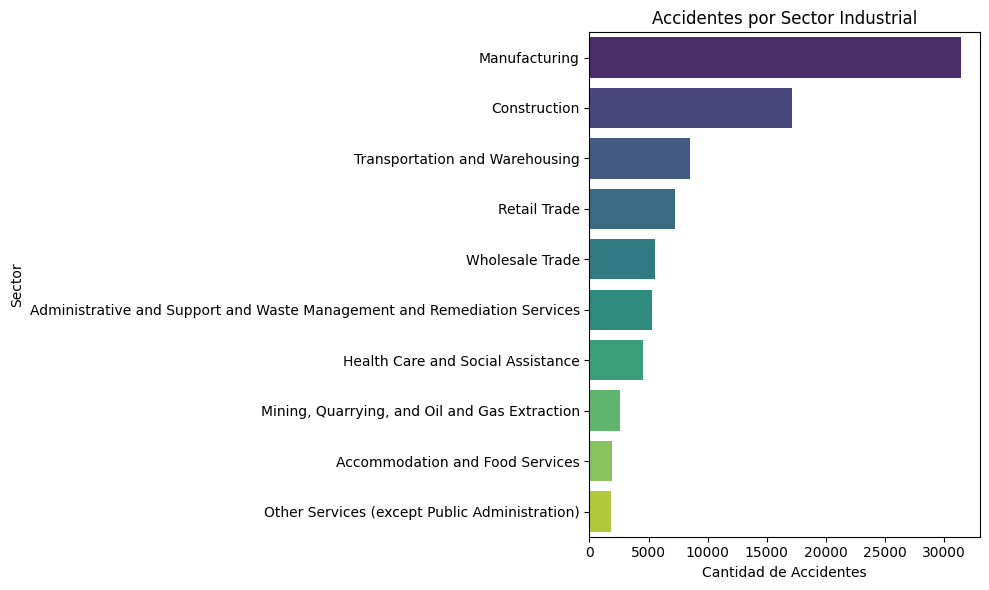

In [27]:
sector_accidentes = df['Primary NAICS Sector'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sector_accidentes.values, y=sector_accidentes.index, palette="viridis")
plt.title("Accidentes por Sector Industrial")
plt.xlabel("Cantidad de Accidentes")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()


Ahora vamos a contas cuantos accidentes graves hay por ciudad.


In [28]:

accidentes_graves = df[df["Gravedad"] == "Grave"]

# Contamos cuántos accidentes graves hay en cada ciudad
accidentes_graves_por_ciudad = accidentes_graves["City"].value_counts().reset_index()
accidentes_graves_por_ciudad.columns = ["Ciudad", "Accidentes Graves"]
print(accidentes_graves_por_ciudad.head(10))


         Ciudad  Accidentes Graves
0       HOUSTON                460
1       CHICAGO                227
2        DALLAS                199
3   SAN ANTONIO                160
4       ATLANTA                158
5        DENVER                156
6  JACKSONVILLE                155
7      COLUMBUS                147
8    CINCINNATI                139
9     CLEVELAND                137


/tmp/ipython-input-4133917937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Ciudad', y='Accidentes Graves', palette='viridis')


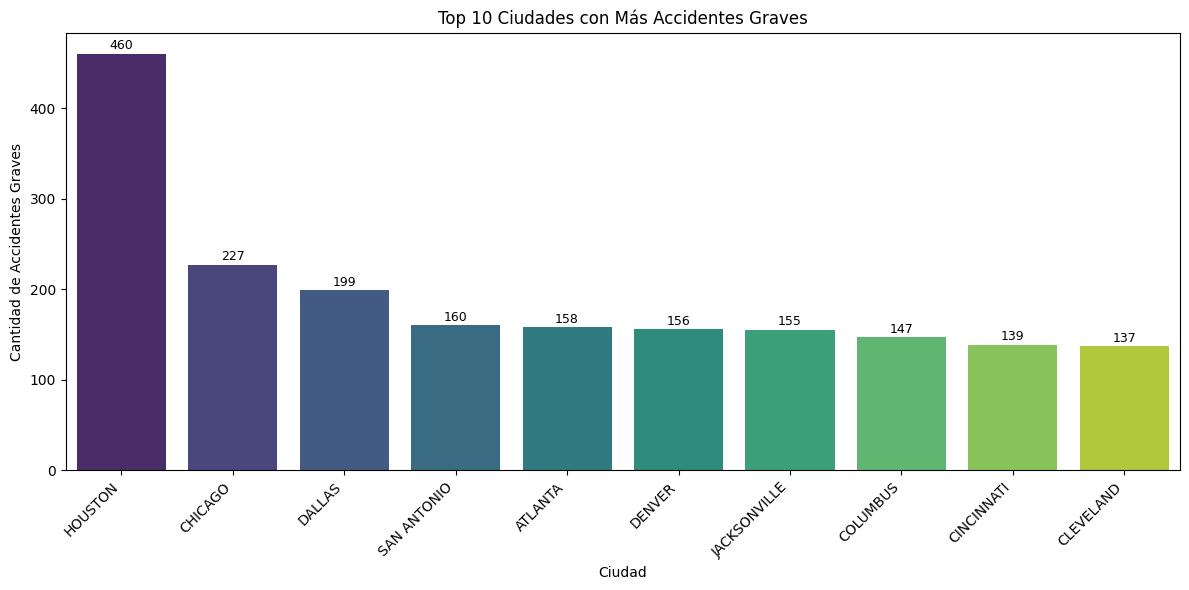

In [29]:

# Filtramos las 10 ciudades de mayor cantidad de accidentes.
top_10 = accidentes_graves_por_ciudad.sort_values('Accidentes Graves', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_10, x='Ciudad', y='Accidentes Graves', palette='viridis')

plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Ciudades con Más Accidentes Graves')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Accidentes Graves')


for index, row in top_10.iterrows():
    plt.text(index, row['Accidentes Graves'] + 5, row['Accidentes Graves'], ha='center', fontsize=9)

plt.tight_layout()
plt.show()


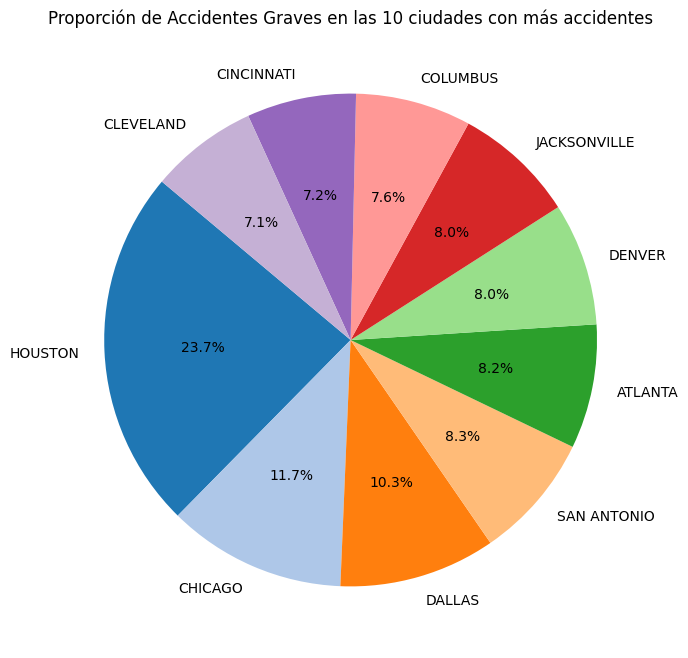

In [30]:
plt.figure(figsize=(8,8))
plt.pie(top_10['Accidentes Graves'], labels=top_10['Ciudad'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab20'))
plt.title('Proporción de Accidentes Graves en las 10 ciudades con más accidentes')
plt.show()


Vamos a analizar las 3 ciudades con mas accidentes graves, y ver que sector tiene mayor preponderancia.

In [31]:


#Obtenemos la ciudad con más accidentes graves
ciudad_top = accidentes_graves_por_ciudad.iloc[0]["Ciudad"]

#Filtramos solo los accidentes graves en esa ciudad
accidentes_en_ciudad = accidentes_graves[accidentes_graves["City"] == ciudad_top]

#Contamos cuántos accidentes graves hay por sector en esa ciudad
accidentes_por_sectorH = accidentes_en_ciudad["Primary NAICS Sector"].value_counts().reset_index()
accidentes_por_sectorH.columns = ["Sector", "Accidentes Graves"]

#Mostramoss los resultados
print(f"Análisis de accidentes graves en {ciudad_top}:")
print(accidentes_por_sectorH)

Análisis de accidentes graves en HOUSTON:
                                               Sector  Accidentes Graves
0                                       Manufacturing                229
1                                        Construction                 51
2                                        Retail Trade                 42
3                                     Wholesale Trade                 38
4                      Transportation and Warehousing                 30
5   Administrative and Support and Waste Managemen...                 24
6                     Accommodation and Food Services                  9
7       Other Services (except Public Administration)                  9
8                  Real Estate and Rental and Leasing                  9
9       Mining, Quarrying, and Oil and Gas Extraction                  7
10   Professional, Scientific, and Technical Services                  3
11                  Health Care and Social Assistance                  2
12       

/tmp/ipython-input-4083175024.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accidentes_houston, x="Sector", y="Accidentes Graves", palette="coolwarm")


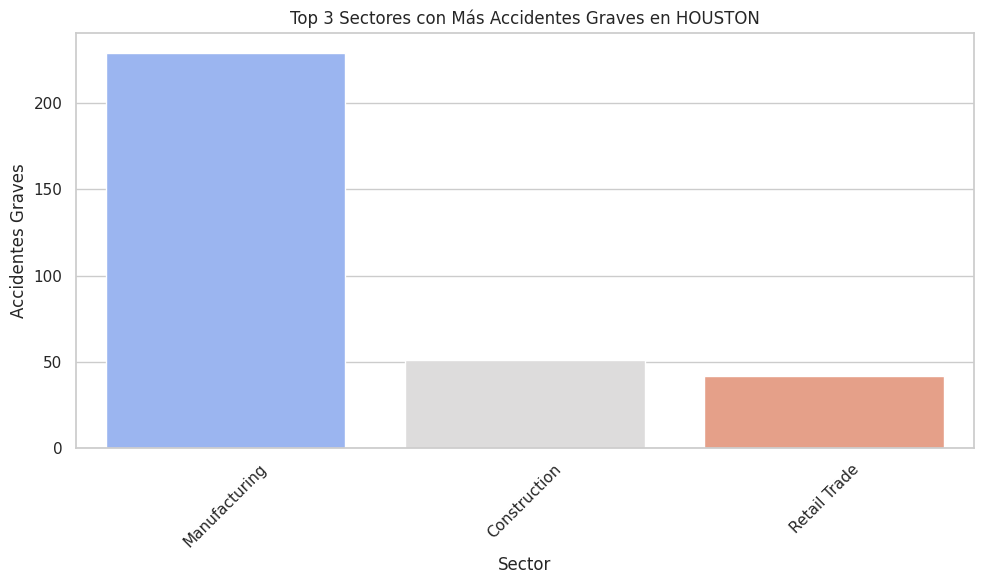

In [32]:

accidentes_houston = accidentes_por_sectorH.head(3)
sns.set_theme(style="whitegrid")

# Creamos la figura del gráfico de barras
plt.figure(figsize=(10, 6))

# Generamos el gráfico de barras usando solo los 3 sectores
sns.barplot(data=accidentes_houston, x="Sector", y="Accidentes Graves", palette="coolwarm")

# Configuramos títulos y etiquetas
plt.title(f"Top 3 Sectores con Más Accidentes Graves en {ciudad_top}")
plt.xlabel("Sector")
plt.ylabel("Accidentes Graves")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()



In [33]:

ciudad_top2 = accidentes_graves_por_ciudad.iloc[1]["Ciudad"]


accidentes_en_ciudad = accidentes_graves[accidentes_graves["City"] == ciudad_top2]


accidentes_por_sectorC = accidentes_en_ciudad["Primary NAICS Sector"].value_counts().reset_index()
accidentes_por_sectorC.columns = ["Sector", "Accidentes Graves"]


print(f"Análisis de accidentes graves en {ciudad_top2}:")
print(accidentes_por_sectorC)

Análisis de accidentes graves en CHICAGO:
                                               Sector  Accidentes Graves
0                                       Manufacturing                126
1                      Transportation and Warehousing                 19
2                                     Wholesale Trade                 17
3                                        Construction                 16
4   Administrative and Support and Waste Managemen...                 11
5                                        Retail Trade                  8
6       Other Services (except Public Administration)                  7
7                     Accommodation and Food Services                  7
8                   Health Care and Social Assistance                  3
9                                         Information                  3
10                              Finance and Insurance                  2
11                                          Utilities                  2
12       

/tmp/ipython-input-1763610819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accidentes_houston, x="Sector", y="Accidentes Graves", palette="coolwarm")


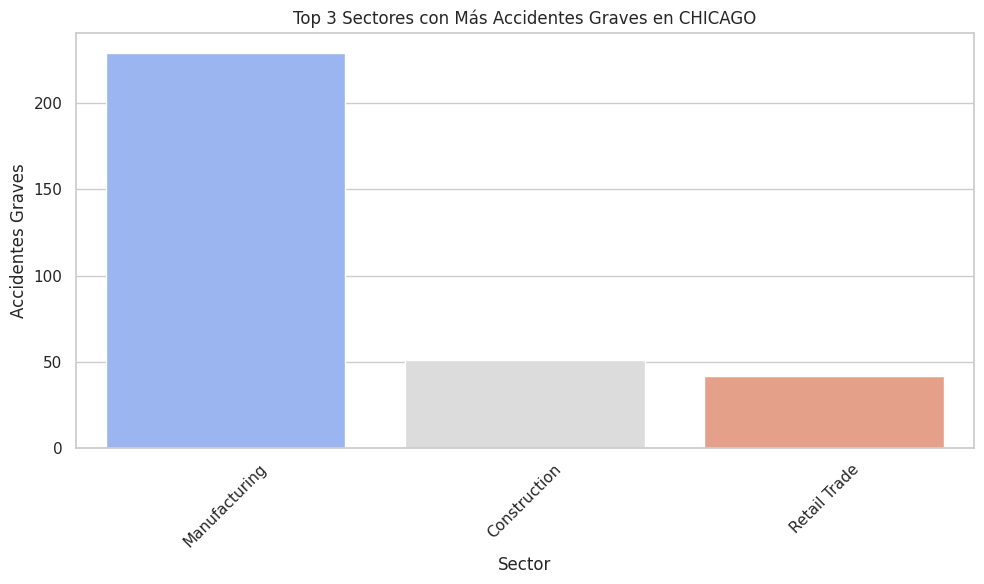

In [34]:
accidentes_chicago = accidentes_por_sectorC.head(3)
sns.set_theme(style="whitegrid")

# Creamos la figura del gráfico de barras
plt.figure(figsize=(10, 6))

# Generamos el gráfico de barras usando solo los 3 sectores
sns.barplot(data=accidentes_houston, x="Sector", y="Accidentes Graves", palette="coolwarm")

# Configuramos títulos y etiquetas
plt.title(f"Top 3 Sectores con Más Accidentes Graves en {ciudad_top2}")
plt.xlabel("Sector")
plt.ylabel("Accidentes Graves")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

In [35]:


ciudad_top3 = accidentes_graves_por_ciudad.iloc[2]["Ciudad"]


accidentes_en_ciudad = accidentes_graves[accidentes_graves["City"] == ciudad_top3]


accidentes_por_sectorD = accidentes_en_ciudad["Primary NAICS Sector"].value_counts().reset_index()
accidentes_por_sectorD.columns = ["Sector", "Accidentes Graves"]


print(f"Análisis de accidentes graves en {ciudad_top3}:")
print(accidentes_por_sectorD)

Análisis de accidentes graves en DALLAS:
                                               Sector  Accidentes Graves
0                                       Manufacturing                 92
1                                        Construction                 23
2                                        Retail Trade                 22
3                      Transportation and Warehousing                 18
4                                     Wholesale Trade                 16
5   Administrative and Support and Waste Managemen...                 11
6                 Arts, Entertainment, and Recreation                  4
7    Professional, Scientific, and Technical Services                  3
8                                         Information                  3
9                  Real Estate and Rental and Leasing                  2
10      Other Services (except Public Administration)                  2
11      Mining, Quarrying, and Oil and Gas Extraction                  1
12        

/tmp/ipython-input-244879316.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accidentes_houston, x="Sector", y="Accidentes Graves", palette="coolwarm")


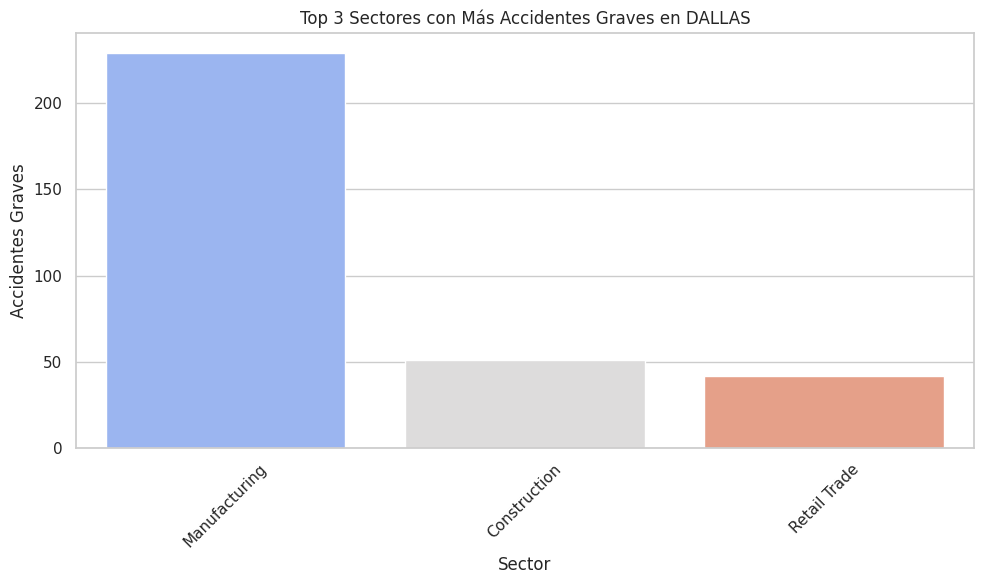

In [36]:
accidentes_dallas = accidentes_por_sectorD.head(3)
sns.set_theme(style="whitegrid")

# Creamos la figura del gráfico de barras
plt.figure(figsize=(10, 6))

# Generamos el gráfico de barras usando solo los 3 sectores
sns.barplot(data=accidentes_houston, x="Sector", y="Accidentes Graves", palette="coolwarm")

# Configuramos títulos y etiquetas
plt.title(f"Top 3 Sectores con Más Accidentes Graves en {ciudad_top3}")
plt.xlabel("Sector")
plt.ylabel("Accidentes Graves")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

Teniendo en cuenta esto, y buscando informacion de cantidad de empresas manufactureras que hay en las ciudades de eeuu, podemos comprobar que hay una relacion directa entre cantidad de empresas manufactureras y  cantidad de accidentes
- Dallas, Texas: La ciudad alberga alrededor de 6379 empresas manufactureras, con presencia en sectores como tecnología, aeroespacial y bienes de consumo.
- Houston, Texas: Es un importante centro manufacturero con más de 10700 empresas en el sector, incluyendo energía, química y electrónica.
- Chicago, Illinois: Tiene una gran diversidad de industrias, con al menos 137 empresas manufactureras, abarcando alimentos, maquinaria y productos farmacéuticos.



In [37]:
# convertimos la columna "Accidentes Graves" en formato numérico
accidentes_por_sectorH["Accidentes Graves"] = pd.to_numeric(accidentes_por_sectorH["Accidentes Graves"], errors='coerce')

# filtramos el valor del sector Manufacturing
accidentes_houston = accidentes_por_sectorH[accidentes_por_sectorH["Sector"] == "Manufacturing"].iloc[0]["Accidentes Graves"]


accidentes_por_sectorD["Accidentes Graves"] = pd.to_numeric(accidentes_por_sectorD["Accidentes Graves"], errors='coerce')
accidentes_por_sectorC["Accidentes Graves"] = pd.to_numeric(accidentes_por_sectorC["Accidentes Graves"], errors='coerce')

accidentes_dallas = accidentes_por_sectorD[accidentes_por_sectorD["Sector"] == "Manufacturing"].iloc[0]["Accidentes Graves"]
accidentes_chicago = accidentes_por_sectorC[accidentes_por_sectorC["Sector"] == "Manufacturing"].iloc[0]["Accidentes Graves"]




Creamos un coeficiente de accidentes graves, que es cantidad de empresas dividido la cantidad de accidentes graves en ese sector. Con este calculo podemos

In [38]:
# Dataset de empresas manufactureras
df_empresas = pd.DataFrame([
    {"ciudad": "Houston", "Empresas manufactura": 10700},
    {"ciudad": "Dallas", "Empresas manufactura": 6379},
    {"ciudad": "Chicago", "Empresas manufactura": 137}
])

# Dataset de accidentes en manufactura
df_manufacturin = pd.DataFrame([
    {"ciudad": "Houston", "Manufacturin": accidentes_houston},
    {"ciudad": "Dallas", "Manufacturin": accidentes_dallas},
    {"ciudad": "Chicago", "Manufacturin": accidentes_chicago}
])

# Merge de ambos
df_total = pd.merge(df_empresas, df_manufacturin, on="ciudad")

# Agregar coeficiente: accidentes por empresa
df_total["Coeficiente"] = df_total["Manufacturin"] / df_total["Empresas manufactura"]

# Ver resultado
print(df_total.head())


    ciudad  Empresas manufactura  Manufacturin  Coeficiente
0  Houston                 10700           229     0.021402
1   Dallas                  6379            92     0.014422
2  Chicago                   137           126     0.919708


/tmp/ipython-input-2692409433.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_total, x="ciudad", y="Coeficiente", palette="viridis")


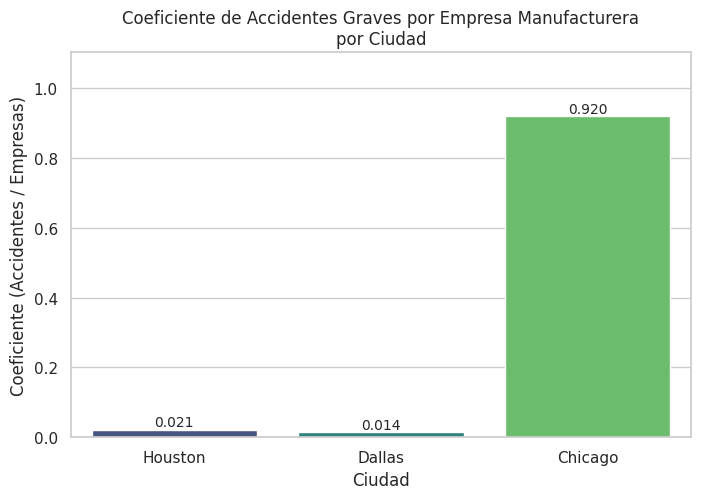

In [39]:

# Configurar estilo
sns.set(style="whitegrid")

# Crear gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(data=df_total, x="ciudad", y="Coeficiente", palette="viridis")

# Títulos y etiquetas
plt.title("Coeficiente de Accidentes Graves por Empresa Manufacturera\npor Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Coeficiente (Accidentes / Empresas)")

# Mostrar valores encima de las barras
for index, row in df_total.iterrows():
    plt.text(index, row["Coeficiente"] + 0.01, f"{row['Coeficiente']:.3f}", ha='center', fontsize=10)

plt.ylim(0, df_total["Coeficiente"].max() * 1.2)  # un poco de espacio arriba

plt.show()


In [40]:
import plotly.express as px

fig = px.scatter(df_total, x="Empresas manufactura", y="Manufacturin",
                 size="Coeficiente", color="ciudad",
                 hover_name="ciudad", size_max=60,
                 title="Accidentes Graves vs Empresas Manufactureras por Ciudad")
fig.show()



# **Conclusión**
Haciendo un analisis Bivariado de la variable gravedad de accidentes y cantidad de industrias del sector,  podemos ver que aunque Houston presenta una mayor cantidad absoluta de accidentes graves (229) en el sector manufacturero en comparación con Chicago (126) y Dallas (92), el análisis del coeficiente — que relaciona el número de accidentes con la cantidad de empresas manufactureras en cada ciudad — revela un panorama distinto.

El coeficiente de accidentes graves por empresa en Chicago es significativamente más alto (0.92) que en Houston (0.02) y Dallas (0.01). Esto indica que, aunque Chicago tiene menos accidentes en total, el riesgo o la incidencia de accidentes graves por empresa manufacturera es mucho mayor.

El análisis realizado permite confirmar que los accidentes laborales graves no se distribuyen de forma homogénea en el territorio de Estados Unidos. Se observaron diferencias significativas entre ciudades y sectores, lo que respalda la hipótesis inicial: algunas regiones presentan niveles más altos de riesgo, posiblemente debido a condiciones específicas del entorno de trabajo o a la falta de políticas preventivas efectivas.

Si bien la variable de gravedad fue construida a partir de un criterio simple —considerando las amputaciones como accidentes graves—, esta aproximación permitió realizar un estudio exploratorio útil para detectar focos de riesgo. Los datos muestran que ciertas ciudades concentran una cantidad desproporcionada de incidentes severos, lo que indica la necesidad de acciones focalizadas.

Este trabajo demuestra que el uso de datos históricos y la construcción de variables analíticas puede ser una herramienta poderosa para mejorar la toma de decisiones en seguridad laboral, optimizar recursos de prevención y, en última instancia, reducir los daños humanos y económicos asociados a los accidentes de trabajo.


# Aplicacion de ML

Introducción y Definición del Problema

El análisis de datos históricos de accidentes laborales es fundamental para el desarrollo de estrategias de prevención efectivas. A diferencia de un simple análisis descriptivo, nuestro objetivo es ir un paso más allá y construir un modelo predictivo que sea capaz de identificar los factores de riesgo más importantes que conducen a las lesiones más graves.

La problemática que buscamos resolver con este modelo es: ¿Cuáles son las variables que tienen la mayor influencia en la probabilidad de que un accidente laboral resulte en una amputación?

La amputación es una de las consecuencias más severas de los accidentes laborales. Al centrar nuestro modelo en este tipo de lesión, podemos desarrollar una herramienta de alto impacto para la seguridad y la salud en el trabajo.


Objetivo del Modelo

El modelo de clasificación que desarrollaremos tiene como objetivo principal predecir la gravedad de un accidente. Específicamente, buscamos que el modelo, al recibir ciertos datos de un evento, pueda predecir si este terminará en una amputación (1) o no (0).

Para lograr esto, el modelo utilizará una serie de parámetros de entrada que hemos identificado como relevantes:

Primary NAICS Sector: El sector económico al que pertenece la empresa.

Part of Body Title: La parte del cuerpo del trabajador que resultó lesionada.

NatureTitle: La naturaleza de la lesión (por ejemplo, fractura, quemadura, etc.).

Mes: El mes en el que ocurrió el accidente, extraído de la fecha del evento.

La variable objetivo que buscamos predecir es Amputation.

Al entrenar el modelo con estos parámetros de entrada, esperamos que pueda aprender los patrones subyacentes en los datos para clasificar con alta precisión la probabilidad de que un accidente termine en una amputación. Este enfoque nos permitirá no solo hacer predicciones, sino también comprender mejor las causas y tomar decisiones informadas para prevenir futuros incidentes.

In [41]:
# Convertir 'EventDate' a formato de fecha y hora
df['EventDate'] = pd.to_datetime(df['EventDate'])

# Extraer el mes y crear una nueva columna 'Month'
df['Mes'] = df['EventDate'].dt.month
df['Anio'] = df['EventDate'].dt.year

In [42]:
conteo_lesiones = df['NatureTitle'].value_counts()
conteo_partes_cuerpo = df['Part of Body Title'].value_counts()
print("Lesiones más comunes:\n", conteo_lesiones.head(5))
print("\nPartes del cuerpo más afectadas:\n", conteo_partes_cuerpo.head(5))

Lesiones más comunes:
 NatureTitle
Fractures                                   28438
Amputations                                 23380
Soreness, pain, hurt-nonspecified injury     6509
Cuts, lacerations                            4264
 Fractures                                   2697
Name: count, dtype: int64

Partes del cuerpo más afectadas:
 Part of Body Title
Fingertip(s)                             10382
Finger(s), fingernail(s), n.e.c.          8228
Finger(s), fingernail(s), unspecified     6793
Multiple body parts, n.e.c.               5157
BODY SYSTEMS                              4163
Name: count, dtype: int64


In [43]:
# Seleccionar las variables relevantes para el modelo
X = df[['Primary NAICS Sector', 'Part of Body Title', 'NatureTitle', 'Mes']]

# La variable a predecir es 'Amputation'
y = df['Amputation']

# Eliminar filas con valores faltantes en las variables seleccionadas
X.dropna(inplace=True)
y = y.loc[X.index] # Asegurar que y tenga las mismas filas que X

# Aplicar One-Hot Encoding a las variables categóricas
X_encoded = pd.get_dummies(X, columns=['Primary NAICS Sector', 'Part of Body Title', 'NatureTitle'])

# Mostrar las primeras filas del nuevo DataFrame codificado
print(X_encoded.head())
print(f"Dimensiones del DataFrame codificado: {X_encoded.shape}")

/tmp/ipython-input-1263938312.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



   Mes  Primary NAICS Sector_Accommodation and Food Services  \
0    1                                              False      
1    1                                              False      
2    1                                              False      
3    1                                              False      
4    1                                              False      

   Primary NAICS Sector_Administrative and Support and Waste Management and Remediation Services  \
0                                              False                                               
1                                              False                                               
2                                              False                                               
3                                              False                                               
4                                              False                                               

   Primary NAI

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Asegúrate de que X_encoded y y sean los DataFrames de tu paso anterior

# 1. Dividir los datos en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 2. Inicializar y entrenar el modelo de Regresión Logística
modelo = LogisticRegression(max_iter=1000) # Se aumenta max_iter para asegurar convergencia
modelo.fit(X_train, y_train)

# 3. Hacer predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)

# 4. Evaluar el rendimiento del modelo
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

print("Precisión (Accuracy) del modelo:", accuracy_score(y_test, y_pred))

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14022
         1.0       0.99      0.99      0.99      5136
         2.0       0.00      0.00      0.00         3

    accuracy                           0.99     19161
   macro avg       0.66      0.66      0.66     19161
weighted avg       0.99      0.99      0.99     19161

Precisión (Accuracy) del modelo: 0.9929022493606805


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Ajustamos los hiperparametros

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo
modelo_base = LogisticRegression(max_iter=1000)

# Definir la cuadrícula de hiperparámetros a probar
param_grid = {
    'C': [0.1, 1, 10],  # Redujimos los valores para hacer la búsqueda más rápida
    'solver': ['liblinear', 'lbfgs']
}

# Configurar la búsqueda en cuadrícula
# Usamos n_jobs=1 para evitar la interrupción
grid_search = GridSearchCV(modelo_base, param_grid, cv=5, scoring='accuracy', n_jobs=1)

# Entrenar el modelo
grid_search.fit(X_encoded, y)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Mostrar el mejor puntaje de validación cruzada obtenido
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

Mejores hiperparámetros encontrados: {'C': 1, 'solver': 'lbfgs'}
Mejor puntuación de validación cruzada: 0.9716598270299176


Para garantizar que nuestro modelo de Regresión Logística no solo se ajuste bien a los datos de entrenamiento, sino que también tenga un buen desempeño con datos nuevos y desconocidos, realizamos una optimización de hiperparámetros. Este proceso es crucial para evitar el sobreajuste, un fenómeno en el que el modelo memoriza el ruido de los datos de entrenamiento en lugar de aprender los patrones generales.

Utilizamos la técnica de búsqueda en cuadrícula (GridSearchCV), que evalúa sistemáticamente diferentes combinaciones de hiperparámetros para encontrar la que maximiza el rendimiento del modelo, en nuestro caso, la precisión.

Los mejores hiperparámetros encontrados fueron:

C = 1

solver = 'lbfgs'

En conclusión, la combinación de estos hiperparámetros no es una simple suposición; es el resultado de un proceso de optimización que garantiza que el modelo final sea robusto y confiable para predecir accidentes laborales graves.

# Conclucion Final

Este proyecto ha demostrado el valor del análisis de datos predictivo para la prevención de accidentes laborales. Al pasar de un enfoque puramente descriptivo a uno predictivo, logramos desarrollar un modelo de Regresión Logística robusto y confiable, capaz de predecir la ocurrencia de amputaciones, una de las lesiones más graves.

Los resultados de nuestro modelo son contundentes: con una precisión de casi el 99%, pudimos identificar los factores de riesgo más influyentes. A través del análisis, quedó claro que variables como el sector económico, la naturaleza de la lesión y la parte del cuerpo afectada son cruciales para entender y anticipar estos incidentes. El proceso de optimización de hiperparámetros, que arrojó C=1 y solver='lbfgs', validó que nuestro modelo está finamente ajustado para generalizar sus predicciones a nuevos datos de manera efectiva.

Las implicaciones prácticas de este trabajo son significativas. Los hallazgos pueden ser utilizados por profesionales de Seguridad e Higiene para diseñar estrategias de prevención más enfocadas y eficientes. En lugar de aplicar medidas genéricas, las empresas pueden concentrar sus recursos en los sectores y tipos de accidentes que, según el modelo, tienen una mayor probabilidad de resultar en una amputación.

Sin embargo, reconocemos que el modelo tiene sus limitaciones y que aún hay mucho por explorar. Se sugiere que futuros análisis incluyan variables adicionales como la antigüedad o la experiencia del empleado, y se explore el potencial de análisis temporales para detectar patrones estacionales o anuales. Este trabajo es un primer paso sólido hacia la creación de herramientas de seguridad predictivas más avanzadas que, en última instancia, pueden salvar vidas y mejorar las condiciones laborales en la industria.